In [1]:
import pandas as pd
import geopandas as gpd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Mask data

# mask_train_df = pd.read_csv("Output/saliency_map_analysis/mask/bands_mean_per_patch_train.csv")
# mask_test_df = pd.read_csv("Output/saliency_map_analysis/mask/bands_mean_per_patch_test.csv")
# mask_train_df.columns = ["patch_name","1","2","3","4","5","6","7","8","9","10","11","12"]
# mask_test_df.columns = ["patch_name","1","2","3","4","5","6","7","8","9","10","11","12"]


# Without Mask data 

# MSC_Thesis/MSc_Thesis_2023/Output/saliency_maps_analysis/nomask/bands_mean_per_patch_test.csv

nomask_train_df = pd.read_csv("Output/saliency_maps_analysis/nomask/bands_mean_per_patch_train.csv")
nomask_test_df = pd.read_csv("Output/saliency_maps_analysis/nomask/bands_mean_per_patch_test.csv")
nomask_train_df.columns = ["patch_name","1","2","3","4","5","6","7","8","9","10","11","12"]
nomask_test_df.columns = ["patch_name","1","2","3","4","5","6","7","8","9","10","11","12"]


target_df = gpd.read_file("Input/Target/concat/target_yield.shp")

# mask_train_df_merged = target_df.merge(mask_train_df, on="patch_name")
# mask_test_df_merged = target_df.merge(mask_test_df, on="patch_name")
nomask_train_df_merged = target_df.merge(nomask_train_df, on="patch_name")
nomask_test_df_merged = target_df.merge(nomask_test_df, on="patch_name")




In [ ]:
# fig, ax = plt.subplots(nrows=6,ncols=13,figsize =(30,30))
# year_list = ['2016','2017','2018','2019','2020','2021']

# for j in range(len(year_list)):
#     query  = mask_train_df_merged.query("year == "+year_list[j]+"")
#     for i in range(1,13):
#         query.plot(column=str(i),ax=ax[j,i-1])
#     query.plot(column="ykg_by_e7",ax=ax[j,12])

# Mask train test

In [6]:
# mask_train_x = mask_train_df_merged.loc[:,["1","2","3","4","5","6","7","8","9","10","11","12"]]
# mask_train_y = mask_train_df_merged.loc[:,["ykg_by_e7"]]
# mask_test_x = mask_test_df_merged.loc[:,["1","2","3","4","5","6","7","8","9","10","11","12"]]
# mask_test_y = mask_test_df_merged.loc[:,["ykg_by_e7"]]
# print("Train X Shape : ",mask_train_x.shape)
# print("Train Y Shape : ",mask_train_y.shape)
# print("Test X Shape : ",mask_test_x.shape)
# print("Test Y Shape : ",mask_test_y.shape)

In [7]:
# reg = LinearRegression().fit(mask_train_x, mask_train_y)

In [8]:
# reg.score(mask_train_x, mask_train_y)

In [9]:
# print("Linear Regression Intercept: ",reg.intercept_)
# importance = reg.coef_.reshape(-1)
# bands = [x for x in range(len(importance))]
# plt.bar(bands, importance)
# plt.xticks(bands)
# plt.show()

In [10]:
# cmap = "RdBu"

In [11]:
# mask_pred_y = reg.predict(mask_test_x)
# mask_test_df_merged["ols_pred_yield"] = mask_pred_y
# mask_test_df_merged["ols_diff"] = mask_test_df_merged["ykg_by_e7"] - mask_test_df_merged["ols_pred_yield"]
# year_list = ['2017','2018','2019','2020','2021']

# min_diff = mask_test_df_merged["ols_diff"].min()
# max_diff = mask_test_df_merged["ols_diff"].max()

# fig,ax = plt.subplots(len(year_list),3,figsize=(10,20))
# for i in range(len(year_list)):
#     query = mask_test_df_merged.query("year == "+year_list[i])
#     query.plot(column = "ykg_by_e7",ax=ax[i,0])
#     query.plot(column = "ols_pred_yield",ax=ax[i,1])
#     query.plot(column = "ols_diff",ax=ax[i,2],vmin=min_diff,vmax=max_diff,legend=True,cmap=cmap)

In [12]:
# true_value = mask_test_df_merged["ykg_by_e7"]
# predicted_value = mask_test_df_merged["ols_pred_yield"]
# plt.figure(figsize=(8,8))
# plt.scatter(true_value, predicted_value, c='crimson',s=5)
# plt.yscale('log')
# plt.xscale('log')

# p1 = max(max(predicted_value), max(true_value))
# p2 = min(min(predicted_value), min(true_value))
# plt.plot([p1, p2], [p1, p2], 'b-')
# plt.xlabel('True Values', fontsize=8)
# plt.ylabel('Predictions', fontsize=8)
# plt.axis('equal')
# plt.show()

In [13]:
# mask_test_df_merged[["ykg_by_e7","ols_pred_yield"]].corr()

# Without Mask train test

In [3]:
nomask_train_x = nomask_train_df_merged.loc[:,["1","2","3","4","5","6","7","8","9","10","11","12"]]
nomask_train_y = nomask_train_df_merged.loc[:,["ykg_by_e7"]]
nomask_test_x = nomask_test_df_merged.loc[:,["1","2","3","4","5","6","7","8","9","10","11","12"]]
nomask_test_y = nomask_test_df_merged.loc[:,["ykg_by_e7"]]
print("Train X Shape : ",nomask_train_x.shape)
print("Train Y Shape : ",nomask_train_y.shape)
print("Test X Shape : ",nomask_test_x.shape)
print("Test Y Shape : ",nomask_test_y.shape)

Train X Shape :  (12411, 12)
Train Y Shape :  (12411, 1)
Test X Shape :  (2013, 12)
Test Y Shape :  (2013, 1)


In [4]:
reg2 = LinearRegression().fit(nomask_train_x, nomask_train_y)
reg2.score(nomask_train_x, nomask_train_y)

0.6177576277411003

Linear Regression Intercept:  [-0.868054]


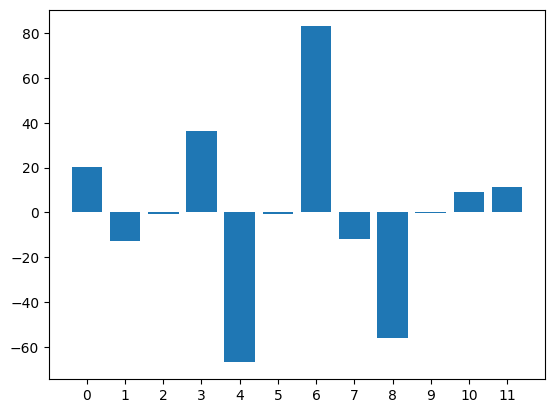

In [5]:
print("Linear Regression Intercept: ",reg2.intercept_)
importance = reg2.coef_.reshape(-1)
bands = [x for x in range(len(importance))]
plt.bar(bands, importance)
plt.xticks(bands)
plt.show()

In [7]:
cmap = "RdBu"

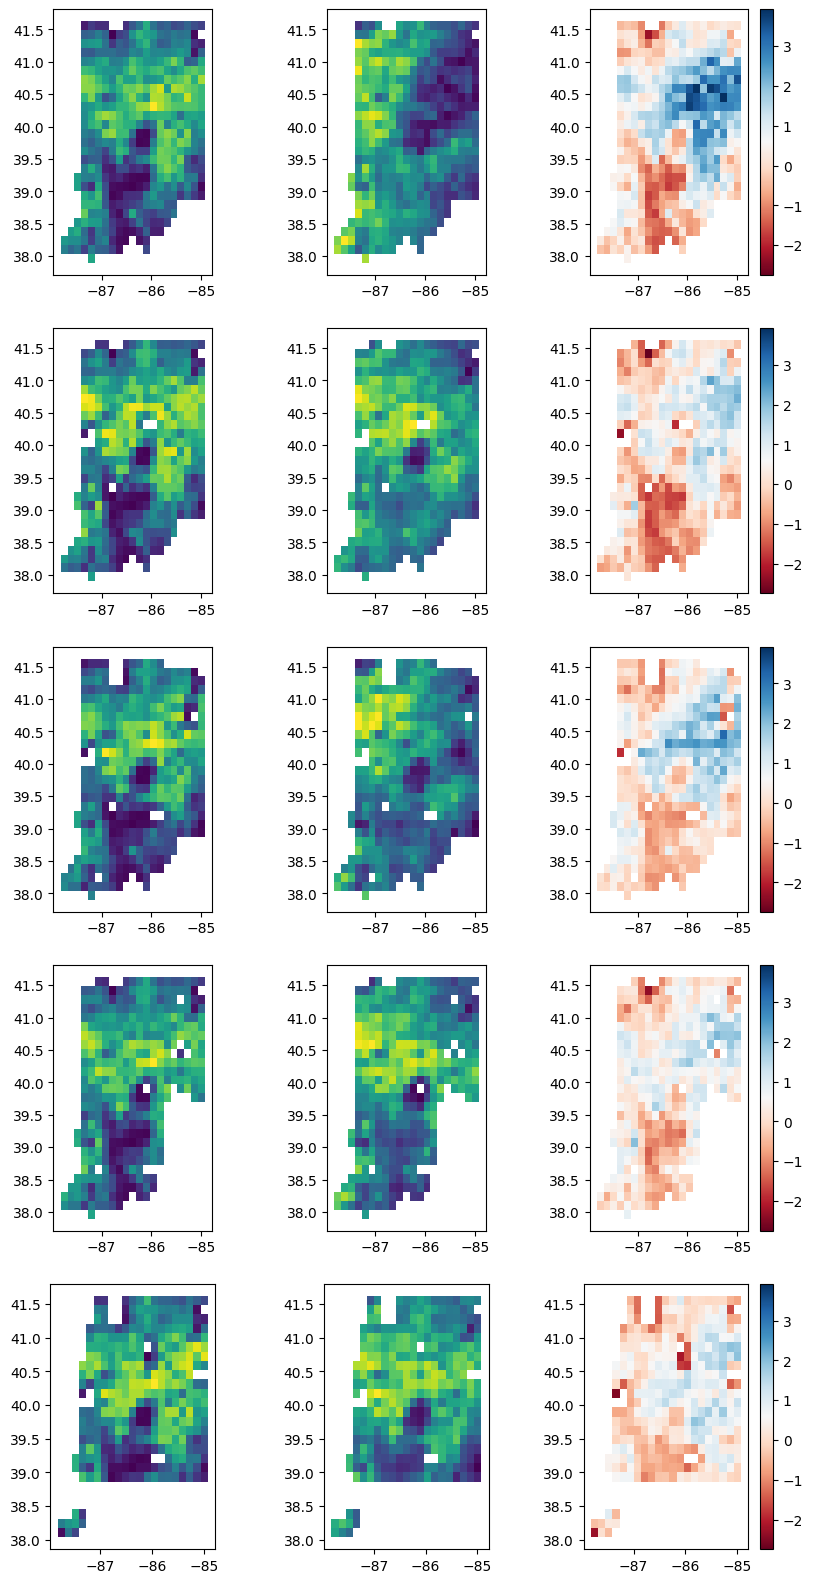

In [8]:
nomask_pred_y = reg2.predict(nomask_test_x)
nomask_test_df_merged["ols_pred_yield"] = nomask_pred_y
nomask_test_df_merged["ols_diff"] = nomask_test_df_merged["ykg_by_e7"] - nomask_test_df_merged["ols_pred_yield"]
year_list = ['2017','2018','2019','2020','2021']
min_diff = nomask_test_df_merged["ols_diff"].min()
max_diff = nomask_test_df_merged["ols_diff"].max()

fig,ax = plt.subplots(len(year_list),3,figsize=(10,20))
for i in range(len(year_list)):
    query = nomask_test_df_merged.query("year == "+year_list[i])

    query.plot(column = "ykg_by_e7",ax=ax[i,0])
    query.plot(column = "ols_pred_yield",ax=ax[i,1])
    query.plot(column = "ols_diff",ax=ax[i,2],vmin=min_diff,vmax=max_diff,legend=True,cmap=cmap)

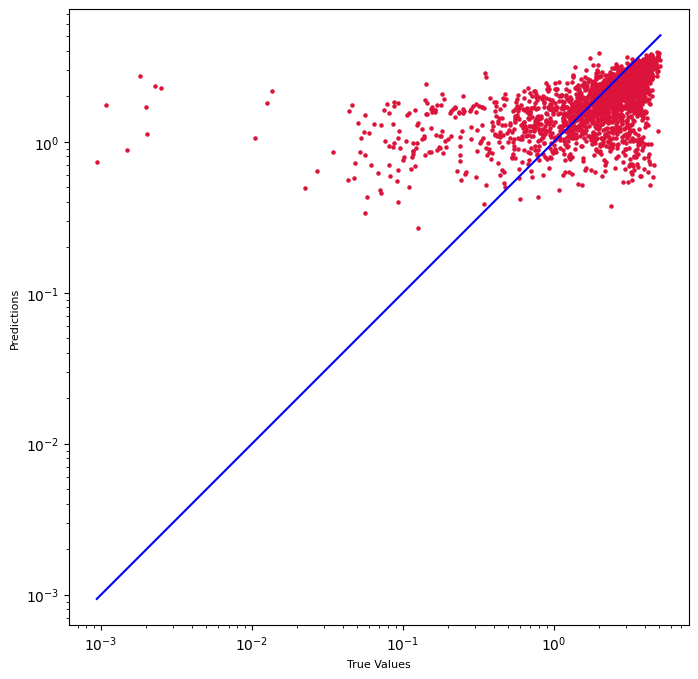

In [9]:
true_value = nomask_test_df_merged["ykg_by_e7"]
predicted_value = nomask_test_df_merged["ols_pred_yield"]
plt.figure(figsize=(8,8))
plt.scatter(true_value, predicted_value, c='crimson',s=5)
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=8)
plt.ylabel('Predictions', fontsize=8)
plt.axis('equal')
plt.show()

In [10]:
nomask_test_df_merged[["ykg_by_e7","ols_pred_yield"]].corr()

,ykg_by_e7,ols_pred_yield
ykg_by_e7,1.000000,0.602857
ols_pred_yield,0.602857,1.000000


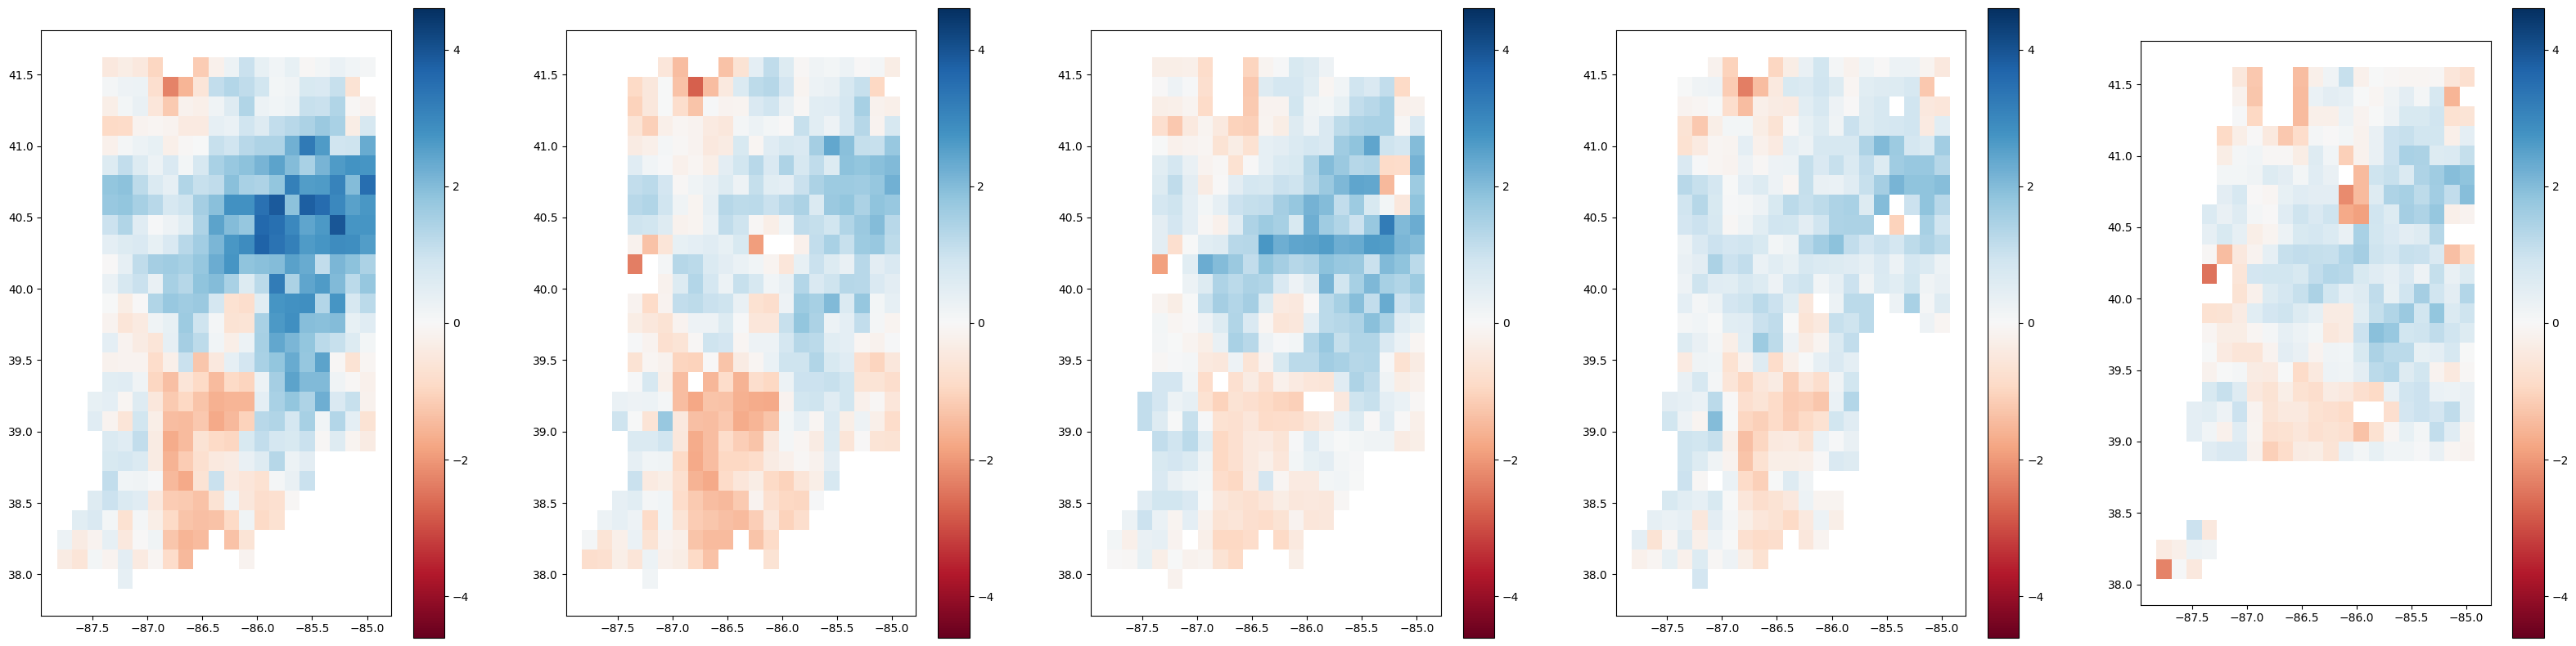

In [15]:
fig,ax = plt.subplots(1,len(year_list),figsize=(40,10))
min_diff = nomask_test_df_merged["ols_diff"].min()
# max_diff = nomask_test_df_merged["ols_diff"].max()
max_diff = abs(min_diff)


# THe min and max of the CNN model
max_diff = 4.605705352387404
min_diff = -4.605705352387404
# max_diff = 4.605705352387404

for i in range(len(year_list)):
    query = nomask_test_df_merged.query("year == "+year_list[i])
    # query2 = mask_test_df_merged.query("year == "+year_list[i])
    query.plot(column = "ols_diff",ax=ax[i],vmin=min_diff,vmax=max_diff,legend=True,cmap=cmap)
    # query2.plot(column = "ols_diff",ax=ax[1,i],vmin=min_diff,vmax=max_diff,legend=True,cmap=cmap)
    